In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
T = 210
u = np.zeros(T)
u[99] = 1
r = np.zeros(T)
r[200] = 0.3
r[199] = 0.5
r[198] = 0.3

In [3]:
dlt_hist = np.empty((0,len(u)))
v_hist = np.empty((0,len(u)))
dltv_hist = np.empty((0,len(u)))
w_hist = np.empty((0,len(u)))
w = np.zeros(T)


e = 1.0
ntrials = 200

for tr in range(ntrials):
    dlt = []
    dltv = []
    v = []
    for t in range(len(u)):
        v.append(np.dot(u[0:t+1],w[0:t+1][::-1]))
        dltv.append(np.dot(u[0:t+2],w[0:t+2][::-1]) - np.dot(u[0:t+1],w[0:t+1][::-1]))
        dlt.append(r[t] + np.dot(u[0:t+2],w[0:t+2][::-1]) - np.dot(u[0:t+1],w[0:t+1][::-1]))
        w[0:t+1][::-1] = w[0:t+1][::-1] + u[0:t+1] * dlt[t] *e
    dlt_hist = np.append(dlt_hist, [dlt], axis = 0)
    v_hist = np.append(v_hist, [v], axis = 0)
    dltv_hist = np.append(dltv_hist, [dltv], axis = 0)
    w_hist = np.append(w_hist, [w], axis = 0)

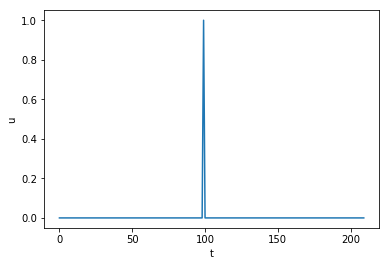

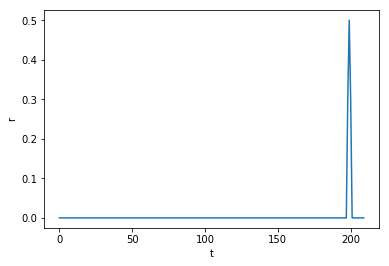

In [4]:
#1
plt.figure()
plt.plot(u)
plt.xlabel('t')
plt.ylabel('u')

plt.figure()
plt.plot(r)
plt.xlabel('t')
plt.ylabel('r')

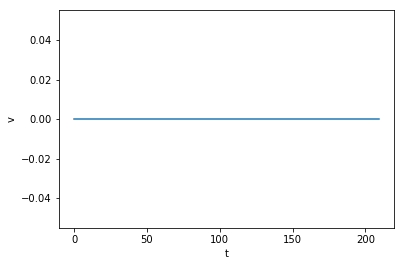

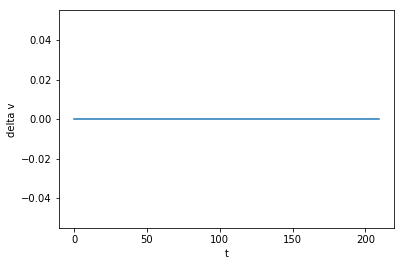

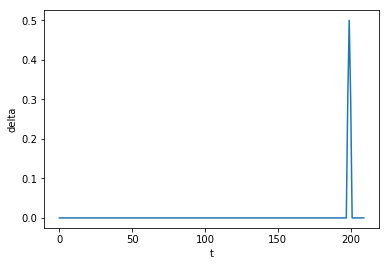

In [5]:
#2
st = 0
stp = ntrials-1

plt.figure()
plt.plot(v_hist[st])
plt.xlabel('t')
plt.ylabel('v')

plt.figure()
plt.plot(dltv_hist[st])
plt.xlabel('t')
plt.ylabel('delta v')

plt.figure()
plt.plot(dlt_hist[st])
plt.xlabel('t')
plt.ylabel('delta')

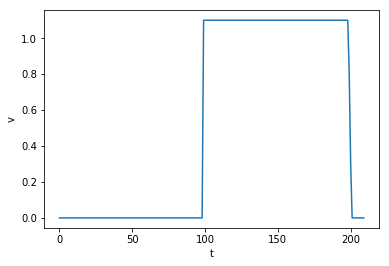

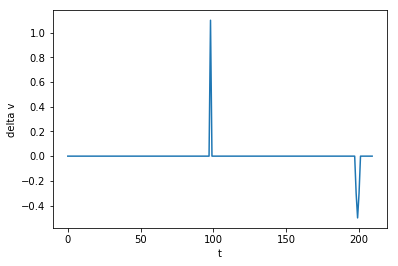

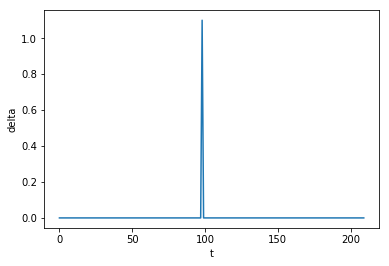

In [6]:
#3
plt.figure()
plt.plot(v_hist[stp])
plt.xlabel('t')
plt.ylabel('v')

plt.figure()
plt.plot(dltv_hist[stp])
plt.xlabel('t')
plt.ylabel('delta v')

plt.figure()
plt.plot(dlt_hist[stp])
plt.xlabel('t')
plt.ylabel('delta')

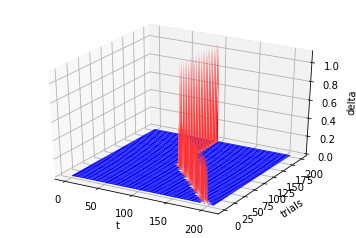

In [7]:
#4
X1, X2 = np.meshgrid(np.arange(T), np.arange(200))
X = np.c_[np.ravel(X1), np.ravel(X2)]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, dlt_hist, cmap='bwr', linewidth=0)
ax.set_xlabel('t')
ax.set_ylabel('trials')
ax.set_zlabel('delta')